In [9]:
%pip install numpy scipy matplotlib

Note: you may need to restart the kernel to use updated packages.


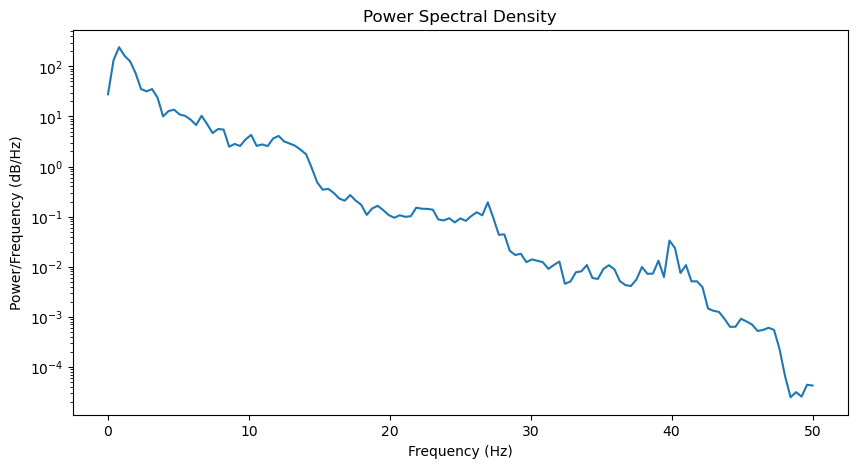

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

with open("eeg-data.txt", "r") as file:
    eeg_data = np.array([float(line) for line in file.readlines()])

frequencies, psd = signal.welch(eeg_data, fs=100)

plt.figure(figsize=(10, 5))
plt.semilogy(frequencies, psd)
plt.title("Power Spectral Density")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power/Frequency (dB/Hz)")
plt.show()



In [11]:
delta_band = (1, 4)
theta_band = (4, 8)
alpha_band = (8, 13)
beta_band = (13, 30)

delta_power = np.trapz(
    psd[(frequencies >= delta_band[0]) & (frequencies <= delta_band[1])]
)
theta_power = np.trapz(
    psd[(frequencies >= theta_band[0]) & (frequencies <= theta_band[1])]
)
alpha_power = np.trapz(
    psd[(frequencies >= alpha_band[0]) & (frequencies <= alpha_band[1])]
)
beta_power = np.trapz(
    psd[(frequencies >= beta_band[0]) & (frequencies <= beta_band[1])]
)

print(f"Delta Power: {delta_power}")
print(f"Theta Power: {theta_power}")
print(f"Alpha Power: {alpha_power}")
print(f"Beta Power: {beta_power}")

Delta Power: 413.1664483838269
Theta Power: 81.56319180120514
Alpha Power: 38.63180754466689
Beta Power: 11.633199020444259


In [12]:
total_power = np.trapz(psd)

delta_relative_power = delta_power / total_power
theta_relative_power = theta_power / total_power
alpha_relative_power = alpha_power / total_power
beta_relative_power = beta_power / total_power

print(f"Delta Relative Power: {delta_relative_power}")
print(f"Theta Relative Power: {theta_relative_power}")
print(f"Alpha Relative Power: {alpha_relative_power}")
print(f"Beta Relative Power: {beta_relative_power}")



Delta Relative Power: 0.3992635851146691
Theta Relative Power: 0.07881862745469553
Alpha Relative Power: 0.037331864772849735
Beta Relative Power: 0.011241747158859682


In [13]:
%pip install mne

  Obtaining dependency information for mne from https://files.pythonhosted.org/packages/79/34/06151e860d86273afd7b2f2fef560783b4afc9e2601b333f008869fb606c/mne-1.6.1-py3-none-any.whl.metadata
  Obtaining dependency information for pooch>=1.5 from https://files.pythonhosted.org/packages/1a/a5/5174dac3957ac412e80a00f30b6507031fcab7000afc9ea0ac413bddcff2/pooch-1.8.0-py3-none-any.whl.metadata
  Obtaining dependency information for lazy-loader>=0.3 from https://files.pythonhosted.org/packages/a1/c3/65b3814e155836acacf720e5be3b5757130346670ac454fee29d3eda1381/lazy_loader-0.3-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 3.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: lazy-loader
    Found existing installation: lazy_loader 0.2
    Uninstalling lazy_loader-0.2:
      Successfully uninstalled lazy_loader-0.2
Note: you may need to restart the kernel to use updated packages.


In [14]:
# Bonus
import mne

psd_mt, frequencies_mt = mne.time_frequency.psd_array_multitaper(eeg_data, 100)


delta_power_mt = np.trapz(
    psd_mt[(frequencies_mt >= delta_band[0]) & (frequencies_mt <= delta_band[1])]
)
theta_power_mt = np.trapz(
    psd_mt[(frequencies_mt >= theta_band[0]) & (frequencies_mt <= theta_band[1])]
)
alpha_power_mt = np.trapz(
    psd_mt[(frequencies_mt >= alpha_band[0]) & (frequencies_mt <= alpha_band[1])]
)
beta_power_mt = np.trapz(
    psd_mt[(frequencies_mt >= beta_band[0]) & (frequencies_mt <= beta_band[1])]
)

print(f"Delta Power (Multitaper): {delta_power_mt}")
print(f"Theta Power (Multitaper): {theta_power_mt}")
print(f"Alpha Power (Multitaper): {alpha_power_mt}")
print(f"Beta Power (Multitaper): {beta_power_mt}")

    Using multitaper spectrum estimation with 7 DPSS windows
Delta Power (Multitaper): 549298.6965571188
Theta Power (Multitaper): 108512.75353360228
Alpha Power (Multitaper): 49079.45532461212
Beta Power (Multitaper): 14647.099472154308
